# Case Study: How Does a Bike-Share Navigate Speedy Success?

Welcome to the Cyclistic bike-share analysis case study! 
Here is my first real work as a junior data analyst that I can show to everyone. I will try to analyze the dataset provided to answer business questions. I’ll follow the steps of the data analysis process which are: ask, prepare, process, analyze and share. 

## Scenario

As a junior data analyst, I’m working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

#### About the company:

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customer.
The goal is: : Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently? 
2. Why would casual riders buy Cyclistic annual memberships? 
3. How can Cyclistic use digital media to influence casual riders to become members?

Reason to use Python instead of something else:
Python is very polyvalent and can do everything with the same programming language. This is the first reason that I have decided to use Python instead of SQL. The second reason is the number of rows inside the dataset. This dataset is about 3.4 million rows. It means it can’t be handled by Excel. 
The third reason is that everyone can look at my work. How did I clean the data, what was important for me? It is much easier for someone else to look at my work.


#### Data Preparation

I have used Cyclistic’s historical trip data to analyze and identify trends. (https://divvy-tripdata.s3.amazonaws.com/index.html) I took the last 12 months to perform an analyst month by month and day by day. It is public and can be used to explore how different riders are using Cyclistic bikes. However, riders’ personally identifiable information has been removed from this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sweetviz as sv
import datetime

In [2]:
df420 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_04_bicycle.csv')
df520 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_05_bicycle.csv')
df620 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_06_bicycle.csv')
df720 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_07_bicycle.csv')
df820 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_08_bicycle.csv')
df920 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_09_bicycle.csv')
df1020 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_10_bicycle.csv')
df1120 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_11_bicycle.csv')
df1220 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_12_bicycle.csv')
df121 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_01_bicycle.csv')
df221 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_02_bicycle.csv')
df321 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_03_bicycle.csv')

In [3]:
df = pd.concat([df420, df520, df620, df720, df820, df920,
                df1020, df1120, df1220, df121, df221,
                df321], sort=False)

#### Cleaning process

In [4]:
# First of all, we need to drop any duplicate data. 
df.drop_duplicates().head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


In [5]:
#check missing value
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])

miss_data

,Total,Percent
end_station_id,143703,0.041179
end_station_name,143242,0.041047
start_station_id,122801,0.035189
start_station_name,122175,0.035010
end_lng,4738,0.001358
end_lat,4738,0.001358
member_casual,0,0.000000
start_lng,0,0.000000
start_lat,0,0.000000
ended_at,0,0.000000


We know that less than 5% of some columns are missing, so we don’t need to remove any columns as it won’t be a problem for our analysis

We create a new column that represents the time spent by a rider. We take the ended time recorded and subtract by the time the rider started at. Another column for the day was also created.
 This will be very helpful for our future analysis and look at the data. 


In [6]:
#change date to calculate the time
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [7]:
#Create variable time
df['time'] = df['ended_at'] - df['started_at'] 
df['time'] = df['time'].dt.total_seconds()/60

In [8]:
df['day'] = pd.to_datetime(df['started_at'], format = '%Y-%m-%d %I-%p')
df['day'] = df['day'].dt.day_name()
df['month'] = df['started_at'].dt.month

In [9]:
df['time'].describe().astype('int')

count    3489748
mean          24
std          390
min       -29049
25%            7
50%           14
75%           26
max        58720
Name: time, dtype: int32

 This is troublesome. The minimal value is negative. This means a rider to time-travel, which is impossible. The 25th quantile is also at 7 mn, so it means at least 1/4th of the data is below 7 mn. 


<AxesSubplot:>

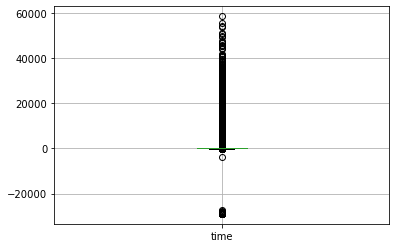

In [10]:
df.boxplot('time')

The graph shows us several data with a negative value above -20000. We can see a lot of data above 20000 mn, which represents more than 333 hours and won't be useful for our analysis. 

In [11]:
#Get rid of outliers
df = df[(df.time < df.time.quantile(.995)) & (df.time > df.time.quantile(.15))]

For this reason, I have decided to keep the data within a range of quantile of 15th to 95th. In other words, all outliers that are below the first 15 % of the data range or above 95% will be removed. This decision was done to waive all data that may not be very representative of a typical rider. With this, we can see a better representation of the time spent by riders

Here is how I count the most used station. I took the decision to get rid of the station that was used less than 100 times. It was a personal decision and nothing to support my thought. However, the most used stations were used more than 10 000 times and a lot of them were used only 1 time in the last 12 months. I don't know if that is an error, but I thought it was a better idea to understand the pattern of riders.

<AxesSubplot:>

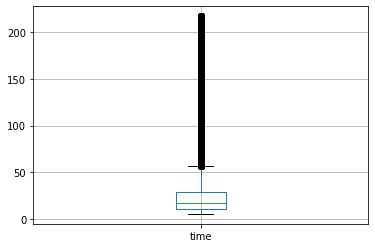

In [13]:
df.boxplot('time')

Now time is in a better shape and usable for my analysis.

In [14]:
#Counts the most used station
station_count = df['start_station_name'].value_counts().reset_index(name='Counts')
station_count.rename(columns={'index': 'start_station_name'}, inplace=True)
station_count


,start_station_name,Counts
0,Streeter Dr & Grand Ave,33040
1,Lake Shore Dr & Monroe St,28326
2,Theater on the Lake,28184
3,Clark St & Elm St,27249
4,Lake Shore Dr & North Blvd,25373
...,...,...
701,N Hampden Ct & W Diversey Ave,1
702,S Michigan Ave & E 118th St,1
703,N Damen Ave & W Wabansia St,1
704,Stewart Ave & 63rd St (*),1


In [15]:
#For a station to be taken into account, it must be at least used 100 in the last 12 months
station_count.drop(station_count.index[station_count['Counts'] <= 100], inplace=True)

In [16]:
station_count.tail()

,start_station_name,Counts
591,Eggleston Ave & 69th St,110
592,Wabash Ave & 83rd St,108
593,Vernon Ave & 79th St,108
594,Eberhart Ave & 91st St,105
595,Loomis Blvd & 84th St,104


In [17]:
#Merge the most used stations to the dataset
merged_df = df.merge(station_count, how = 'inner', on = ['start_station_name'])

In [18]:
#Do the same for the end_station_count
end_station_count = merged_df['end_station_name'].value_counts().reset_index(name='Counts')
end_station_count.rename(columns={'index':'end_station_name'}, inplace=True)

In [19]:
#Delete station visited less than a 100 times (end_station_name)
end_station_count.drop(end_station_count.index[end_station_count['Counts'] <= 100], inplace=True)

In [20]:
#merged with merged_df 
merged_df = merged_df.merge(end_station_count, how = 'inner', on = ['end_station_name'])
merged_df.drop(['Counts_x', 'Counts_y'], axis = 1, inplace = True) 

In [21]:
import datetime
#get the month with another column 
merged_df['month'] = merged_df['started_at'].dt.month

In [22]:
import sweetviz as sv

In [23]:
df_report = merged_df[['ride_id','rideable_type','member_casual', 'time', 'day','month', 'start_station_name','end_station_name']]
report=sv.analyze(df_report)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We got a lot of insights with this report, for example almost 60 % of riders were members. So there are more members than Casual riders. Also, the docked_bike was the most used. Almost 80 % of riders used it

Other columns didn’t need to be cleaned. 
For example, ride_id will always be different as all id are different from the other. In other words, a special id is attributed to a new trip. So, we can’t do any analysis with this data. 
Rideable_type contains only 3 distinct data 
start_station_id and end_station_id could be removed from the dataset as it wasn’t useful. 

As the cleaning phase is over, we can look at this dataset in more detail. 


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795614 entries, 0 to 2795613
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  time                float64       
 14  day                 object        
 15  month               int64         
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 362.6+ MB


### Analysis phase

The data was divided between Casual and Member dataset.
The analysis is focusing on the time spent on average per member given a day. I separate the dataset and decide to merge them to get the table Monday to Sunday and the time on average


In [25]:
#separate casual and member data
casual_df = merged_df[merged_df['member_casual'] == 'casual']
casual_df = casual_df.rename(columns={'member_casual':'casual'})
member_df = merged_df[merged_df['member_casual'] == 'member']
member_df = member_df.rename(columns={'member_casual':'member'})

In [26]:
#Get the mean time spent by riders per day as a casual
casual_daytime = casual_df.groupby("day").agg({'casual':'count',
                                               'time':'mean'}).astype('int')
casual_daytime = casual_daytime.reset_index()
casual_daytime = casual_daytime.rename(columns={'time':'avg_casual_time'})

In [27]:
#Get the mean time spent by riders per day as a member
member_daytime = member_df.groupby("day").agg({'member':'count',
                                               'time':'mean'}).astype('int')
member_daytime = member_daytime.reset_index()
member_daytime = member_daytime.rename(columns={'time':'avg_member_time',
                                               'day':'day1'})

In [28]:
mc_daytime = pd.concat([casual_daytime, member_daytime], axis=1)
mc_daytime.drop(['day1'], axis=1, inplace=True)

In [29]:
mc_daytime.head()

,day,casual,avg_casual_time,member,avg_member_time
0,Friday,180149,32,231020,17
1,Monday,129550,34,197963,17
2,Saturday,297743,37,253095,19
3,Sunday,232752,38,206851,19
4,Thursday,142287,31,225095,17


In [30]:
#Rearrange the days
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mc_daytime['day'] = pd.Categorical(mc_daytime['day'], categories=cats, ordered=True)
mc_daytime = mc_daytime.sort_values('day')

In [34]:
mc_daytime.head()

,day,casual,avg_casual_time,member,avg_member_time
1,Monday,129550,34,197963,17
5,Tuesday,123950,32,211542,17
6,Wednesday,135052,31,228565,17
4,Thursday,142287,31,225095,17
0,Friday,180149,32,231020,17


Text(0.5, 1.0, 'Members / Casual riders comparaison per day and average usage (mn)')

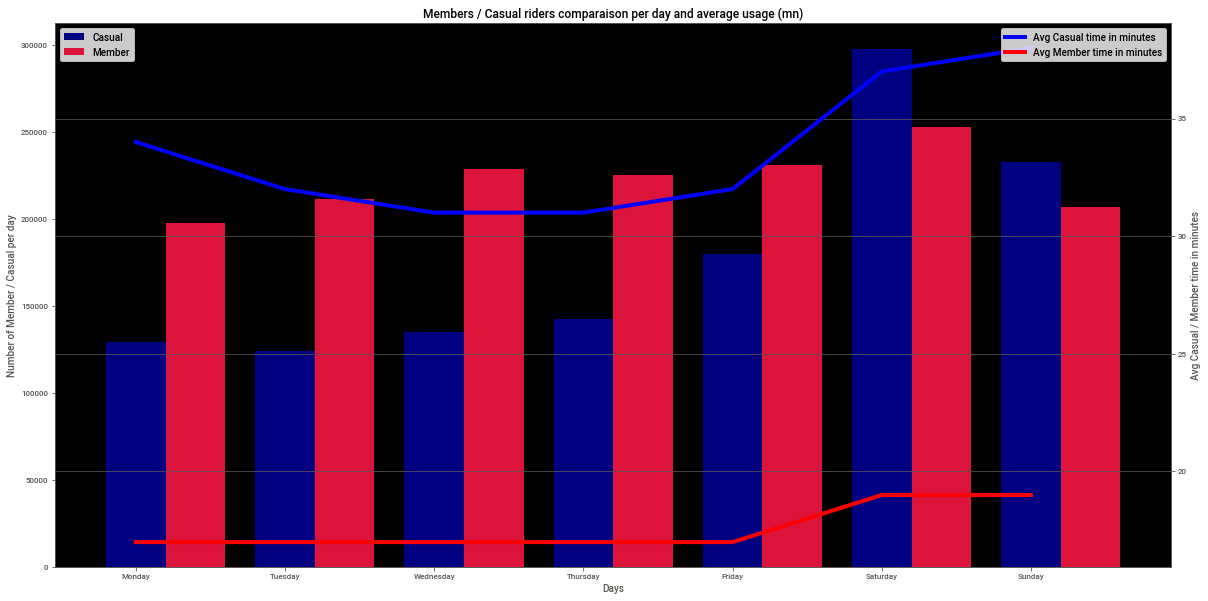

In [35]:
#Plot for data vizualisation
import matplotlib.pyplot as plt
%matplotlib inline

w = 0.4
x = mc_daytime['day']
y1 = mc_daytime['casual']
y2 = mc_daytime['member']
y3 = mc_daytime['avg_casual_time']
y4 = mc_daytime['avg_member_time']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()

ax.bar(bar1, y1,w, label='Casual', color = 'navy')
ax.bar(bar2, y2,w, label='Member', color = 'crimson')
ax2.plot(x, y3, color = 'blue', label='Avg Casual time in minutes', linewidth=4.0)
ax2.plot(x, y4, color = 'red', label='Avg Member time in minutes', linewidth=4.0)
ax.patch.set_facecolor('black')


plt.grid(True)
plt.xticks(bar1,x)
ax.legend(loc=2)
ax2.legend(loc=1)
plt.xlabel('Days')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Member / Casual per day")
plt.ylabel('Avg Casual / Member time in minutes')


plt.title('Members / Casual riders comparaison per day and average usage (mn)')

This graph shows us the difference between the number of members and casuals on average per day as well as the time spent. This graph gives us a lot of insights into the difference of behaviors between Members and Casual. 

As we can see, Casual riders’ behavior is very different on the weekend than on weekdays. 

The amount is increased by more than 2 times and the pick on Saturday with 296905 riders

Their average time per day is also increased by a lot on the weekend. The pick is on Sunday with 38 mn per person. 
The number of Members does not change as much as Casual riders. It used to be the same on average. The time on average does not change as well, but it increased by 2mn on the weekend. 

This graph shows us a big difference in behavior between Casual and Member riders. Members paid for a full-year membership, so they can use it every time. This is shown by their habit as it doesn’t change over days. The first hypothesis I want to observe is: 
Do members riders use to take the bicycle to go to their workplace? 
Do casual riders want to take to visit the city or having fun with people?

This graph gives us a lot of insight, but we still need other data, so we will keep the same parameters (Average number and average time spent) but it won’t be by day but by month.


In [36]:
#Get the mean time spent by riders per day as a member
member_monthtime = member_df.groupby("month").agg({'member':'count',
                                                   'time':'mean'}).astype('int')
member_monthtime = member_monthtime.reset_index()
member_monthtime.rename(columns={'time':'avg_member_time'}, inplace=True)

In [37]:
casual_monthtime = casual_df.groupby("month").agg({'casual':'count',
                                               'time':'mean'}).astype('int')
casual_monthtime = casual_monthtime.reset_index()
casual_monthtime.rename(columns={'time':'avg_casual_time',
                                 'month':'month1'}, inplace=True)

In [38]:
mc_monthtime = pd.merge(member_monthtime, casual_monthtime, left_index=True, right_index=True)
mc_monthtime.drop('month1', axis=1, inplace=True)

In [39]:
mc_monthtime

,month,member,avg_member_time,casual,avg_casual_time
0,1,49566,14,12447,22
1,2,26945,16,7657,28
2,3,98771,16,68301,31
3,4,50851,19,22152,35
4,5,97301,21,81642,39
5,6,161741,19,145250,37
6,7,238475,19,252157,39
7,8,265733,18,261282,35
8,9,224816,17,196012,31
9,10,163774,16,108790,28


Text(0.5, 1.0, 'Members / Casual riders comparaison per month and average usage (mn)')

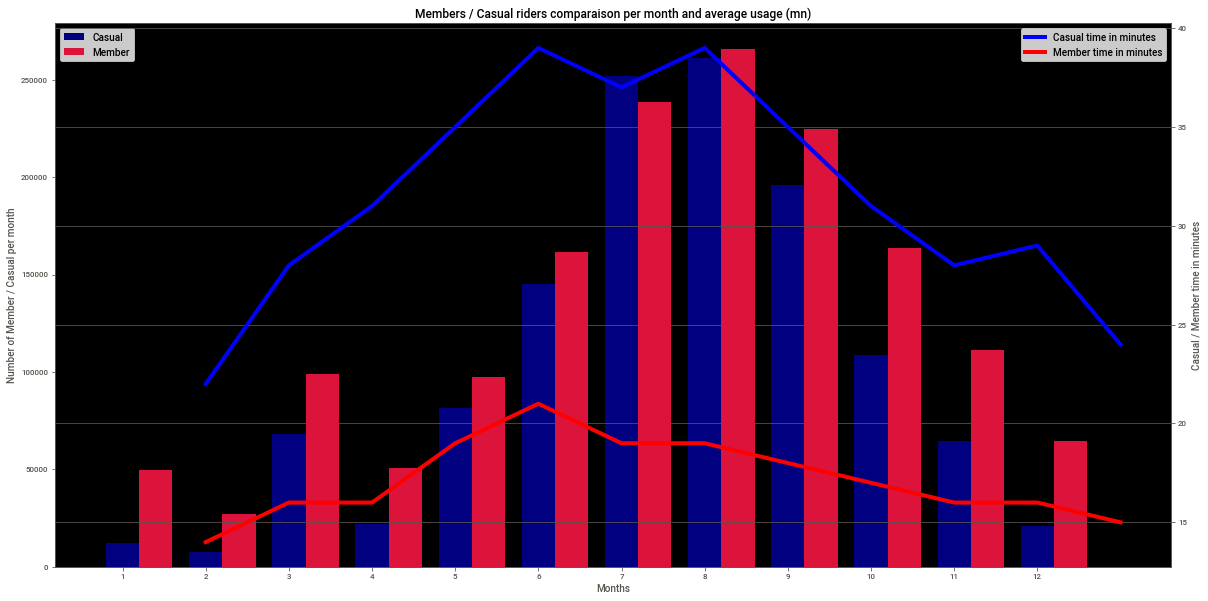

In [40]:
#Plot for data vizualisation

w = 0.4
x = mc_monthtime['month']
y1 = mc_monthtime['casual']
y2 = mc_monthtime['member']
y3 = mc_monthtime['avg_casual_time']
y4 = mc_monthtime['avg_member_time']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()

ax.bar(bar1, y1,w, label='Casual', color = 'navy')
ax.bar(bar2, y2,w, label='Member', color = 'crimson')
ax2.plot(x, y3, color = 'blue', label='Casual time in minutes', linewidth=4.0)
ax2.plot(x, y4, color = 'red', label='Member time in minutes', linewidth=4.0)
ax.patch.set_facecolor('black')


plt.grid(True)
plt.xticks(bar1,x)
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_xlabel("Months")
ax.set_ylabel("Number of Member / Casual per month")
plt.ylabel('Casual / Member time in minutes')


plt.title('Members / Casual riders comparaison per month and average usage (mn)')

Second graph with the behavior of Members and Casuals. We can see two different periods, Summer and Winter. 

On the first hand, in the winter, few riders accept to take to travel on a bicycle. For example, in February, only 26655 member riders and 7616 casual riders agreed to travel by bicycle. Their average time in Winter is the lowest (23 mn for casual and 15 for members).

On the other hand, the number increased by 10 times for July. Indeed 260660 casual riders took the bicycle and 263915 member riders. 

Even if casual and members used to behave in the same way regarding the number of riders, their times are very different. Casual riders take more time than member riders. (On average more than 30mn in summer)
Summer is surely the pic season for Cyclistic as a lot of people are using it daily. 

Casual riders can be a rider who is interesting to take the bike only for a moment and spend time. 
They can also be a tourist who comes into Chicago and wants to take the bike to visit the city, especially in summer. 


In [41]:
#The % of member using different bikes
member_df.groupby('rideable_type')['member'].count() / member_df['member'].count()*100

rideable_type
classic_bike     12.020415
docked_bike      75.718971
electric_bike    12.260614
Name: member, dtype: float64

In [42]:
#The % of casual using different bikes
casual_df.groupby('rideable_type')['casual'].count() / casual_df['casual'].count()*100

rideable_type
classic_bike      5.058144
docked_bike      83.546855
electric_bike    11.395001
Name: casual, dtype: float64

We can see the percentage. There is not a lot to say about those numbers. 
Docked_bike is the most used bike. There is also a difference between members and casuals. 

75 % of the members are using it instead of 83 % of casuals riders.

In [47]:
#Is it correlated to the temperature ? 
#Took average degrees from this site: https://www.climatsetvoyages.com/climat/etats-unis/chicago
Temperature = {'Temperature':[-4.6,-2.4,3.2,9.4,15.1,20.5,23.3,22.4,18.1,11.4,4.6,-2.3]}
mc_monthtime['temperature'] = pd.DataFrame(Temperature)

In [48]:
mc_monthtime['temperature'] = pd.DataFrame(Temperature)
mc_monthtime.head()

,month,member,avg_member_time,casual,avg_casual_time,temperature
0,1,49566,14,12447,22,-4.6
1,2,26945,16,7657,28,-2.4
2,3,98771,16,68301,31,3.2
3,4,50851,19,22152,35,9.4
4,5,97301,21,81642,39,15.1


Text(36.99999999999999, 0.5, 'User amount and time')

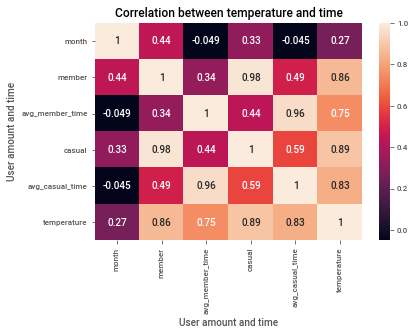

In [49]:
correlated_matrix = mc_monthtime.corr(method='pearson')
sns.heatmap(correlated_matrix, annot=True)

plt.title('Correlation between temperature and time')

plt.xlabel('User amount and time')

plt.ylabel('User amount and time')

I took the average temperature at Chicago and try to plot a heatmap, we can see the correlation between Temperature and the time spent by riders are highly correlated. 
(0.86 for number of Members and 0.89 for the number of casual riders and 0.73 for average_member_time and 0.83 for average_casual_time.

## Conclusion

How do annual members and casual riders use Cyclistic bikes differently? 
In summary:
Casuals are more willing to riders than members on weekends rather than on weekdays 
Their average time on weekends is higher than on weekdays 

Most members and casuals spent their time in summer and we can see the average time spent on a bike and the number of riders are highly correlated to the temperature at Chicago. 

So, why would casual riders buy Cyclistic annual memberships? 
It may cost less money on average with annual memberships. A lot of casuals are using the bike on weekends and in summer.

How can Cyclistic use digital media to influence casual riders to become members? 
Select people who live in Chicago. Take the price as a member and show how much someone can save if a casual rider decides to become a member.